In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from scipy import stats

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
X_train = train_data.drop('Crop', axis=1)
y_train = train_data['Crop']
X_test = test_data.drop('Crop', axis=1)
y_test = test_data['Crop']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
nb = GaussianNB()

cross_val_scores = cross_val_score(nb, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.99352751 1.         0.99675325 0.98701299 0.99350649]
Mean Cross-Validation Score: 0.9941600470726684


In [5]:
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(nb, np.vstack((X_train_scaled, X_test_scaled)), np.hstack((y_train, y_test)), cv=5)

print(f'Accuracy: {accuracy}')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print(classification_report(y_test, y_pred))

Accuracy: 0.9922279792746114
Cross-validation scores: [0.99481865 0.99740933 0.98961039 0.99220779 0.99220779]
Mean CV accuracy: 0.993250790660117
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        18
           8       0.89      1.00      0.94        16
           9       1.00      1.00      1.00        24
          10       0.93      1.00      0.97        14
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        16
          13       1.00      0.94      0.97        16
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.0

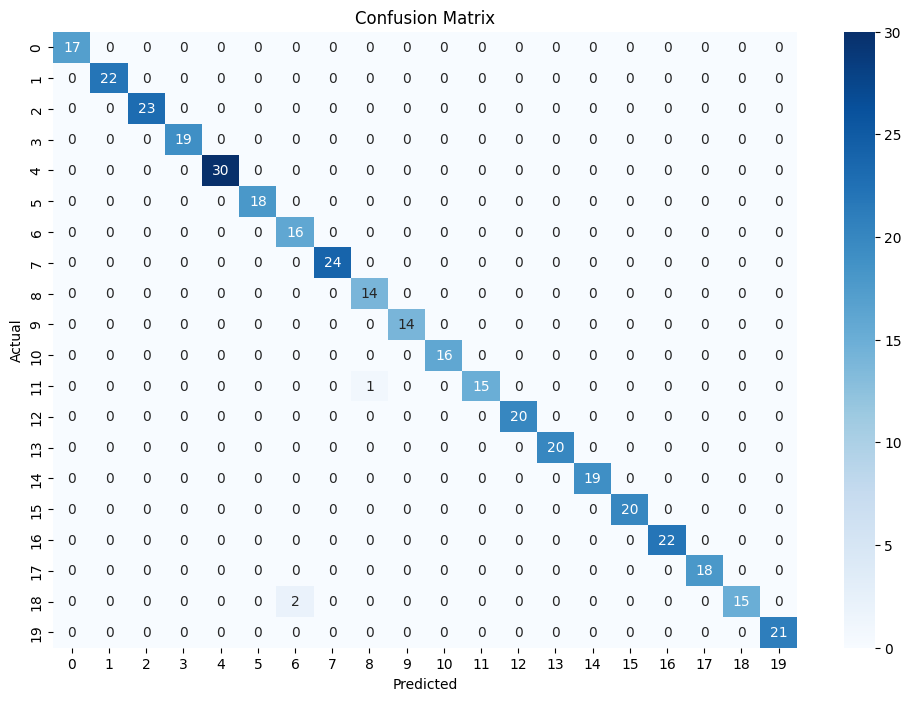

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()